In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline
plt.style.use('ggplot')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [83]:
data = pd.read_csv('irrigation.csv')
data.head()

timestamp  Soil humidity 1  Irrigation field 1  Soil humidity 2  \
0  2019-02-23 00:00:00            67.92                 0.0            55.72   
1  2019-02-23 00:05:00            67.89                 0.0            55.74   
2  2019-02-23 00:10:00            67.86                 0.0            55.77   
3  2019-02-23 00:15:00            67.84                 0.0            55.79   
4  2019-02-23 00:20:00            67.81                 0.0            55.82   

   Irrigation field 2  Soil humidity 3  Irrigation field 3  Soil humidity 4  \
0                 0.0            -1.56                 1.0            26.57   
1                 0.0            -1.51                 1.0            26.58   
2                 0.0            -1.47                 1.0            26.59   
3                 0.0            -1.42                 1.0            26.61   
4                 0.0            -1.38                 1.0            26.62   

   Irrigation field 4  Air temperature (C)  Air humidity (%)  Pressure (KPa)  \
0                 1.0                19.52             55.04          101.50   
1                 1.0                19.49             55.17          101.50   
2                 1.0                19.47             55.30          101.51   
3                 1.0                19.54             54.20          101.51   
4                 1.0                19.61             53.09          101.51   

   Wind speed (Km/h)  Wind gust (Km/h)  Wind direction (Deg)  
0               2.13              6.30                225.00  
1               2.01             10.46                123.75  
2               1.90             14.63                 22.50  
3               2.28             16.08                123.75  
4               2.66             17.52                225.00

In [84]:
data.shape

(28049, 15)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28049 entries, 0 to 28048
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             28049 non-null  object 
 1   Soil humidity 1       8917 non-null   float64
 2   Irrigation field 1    10066 non-null  float64
 3   Soil humidity 2       26304 non-null  float64
 4   Irrigation field 2    28029 non-null  float64
 5   Soil humidity 3       16086 non-null  float64
 6   Irrigation field 3    17236 non-null  float64
 7   Soil humidity 4       26306 non-null  float64
 8   Irrigation field 4    28029 non-null  float64
 9   Air temperature (C)   23995 non-null  float64
 10  Air humidity (%)      23995 non-null  float64
 11  Pressure (KPa)        23995 non-null  float64
 12  Wind speed (Km/h)     23995 non-null  float64
 13  Wind gust (Km/h)      23995 non-null  float64
 14  Wind direction (Deg)  23995 non-null  float64
dtypes: float64(14), obj

In [86]:
print(f'The number of rows are {data.shape[0] } and the number of columns are {data.shape[1]}')

The number of rows are 28049 and the number of columns are 15


In [87]:
#Finding all the categorical and continuous values
categorical_col=[]
continuous_val=[]


for i in data.columns:
    
    if data[i].dtype == 'object':
        categorical_col.append(i)
    else:
        continuous_val.append(i)
        
print(categorical_col)
print(continuous_val)


['timestamp']
['Soil humidity 1', 'Irrigation field 1', 'Soil humidity 2', 'Irrigation field 2', 'Soil humidity 3', 'Irrigation field 3', 'Soil humidity 4', 'Irrigation field 4', 'Air temperature (C)', 'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)', 'Wind gust (Km/h)', 'Wind direction (Deg)']


In [88]:
data.nunique()

timestamp               28049
Soil humidity 1          2827
Irrigation field 1          2
Soil humidity 2          6566
Irrigation field 2          2
Soil humidity 3          6082
Irrigation field 3          2
Soil humidity 4          5150
Irrigation field 4          2
Air temperature (C)      2878
Air humidity (%)         8142
Pressure (KPa)            137
Wind speed (Km/h)        2257
Wind gust (Km/h)         4799
Wind direction (Deg)      547
dtype: int64

In [89]:
data.isnull().sum()

timestamp                   0
Soil humidity 1         19132
Irrigation field 1      17983
Soil humidity 2          1745
Irrigation field 2         20
Soil humidity 3         11963
Irrigation field 3      10813
Soil humidity 4          1743
Irrigation field 4         20
Air temperature (C)      4054
Air humidity (%)         4054
Pressure (KPa)           4054
Wind speed (Km/h)        4054
Wind gust (Km/h)         4054
Wind direction (Deg)     4054
dtype: int64

# Visualizing the missing values

In [90]:
# Complete the call to convert the date column
data['timestamp'] =  pd.to_datetime(data['timestamp'])

# Confirm the date column is in datetime format
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28049 entries, 0 to 28048
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             28049 non-null  datetime64[ns]
 1   Soil humidity 1       8917 non-null   float64       
 2   Irrigation field 1    10066 non-null  float64       
 3   Soil humidity 2       26304 non-null  float64       
 4   Irrigation field 2    28029 non-null  float64       
 5   Soil humidity 3       16086 non-null  float64       
 6   Irrigation field 3    17236 non-null  float64       
 7   Soil humidity 4       26306 non-null  float64       
 8   Irrigation field 4    28029 non-null  float64       
 9   Air temperature (C)   23995 non-null  float64       
 10  Air humidity (%)      23995 non-null  float64       
 11  Pressure (KPa)        23995 non-null  float64       
 12  Wind speed (Km/h)     23995 non-null  float64       
 13  Wind gust (Km/h)

In [91]:
data.head(30)

timestamp  Soil humidity 1  Irrigation field 1  Soil humidity 2  \
0  2019-02-23 00:00:00            67.92                 0.0            55.72   
1  2019-02-23 00:05:00            67.89                 0.0            55.74   
2  2019-02-23 00:10:00            67.86                 0.0            55.77   
3  2019-02-23 00:15:00            67.84                 0.0            55.79   
4  2019-02-23 00:20:00            67.81                 0.0            55.82   
5  2019-02-23 00:25:00            67.78                 0.0            55.85   
6  2019-02-23 00:30:00            67.76                 0.0            55.87   
7  2019-02-23 00:35:00            67.73                 0.0            55.90   
8  2019-02-23 00:40:00            67.70                 0.0            55.92   
9  2019-02-23 00:45:00            67.68                 0.0            55.95   
10 2019-02-23 00:50:00            67.65                 0.0            55.97   
11 2019-02-23 00:55:00            67.62                 0.0            56.00   
12 2019-02-23 01:00:00            67.59                 0.0            56.00   
13 2019-02-23 01:05:00            67.57                 0.0            56.00   
14 2019-02-23 01:10:00            67.54                 0.0            56.00   
15 2019-02-23 01:15:00            67.51                 0.0            56.00   
16 2019-02-23 01:20:00            67.49                 0.0            56.00   
17 2019-02-23 01:25:00            67.46                 0.0            56.00   
18 2019-02-23 01:30:00            67.43                 0.0            56.00   
19 2019-02-23 01:35:00            67.41                 0.0            56.00   
20 2019-02-23 01:40:00            67.38                 0.0            56.00   
21 2019-02-23 01:45:00            67.35                 0.0            56.00   
22 2019-02-23 01:50:00            67.32                 0.0            56.00   
23 2019-02-23 01:55:00            67.30                 0.0            56.00   
24 2019-02-23 02:00:00            67.27                 0.0            56.00   
25 2019-02-23 02:05:00            67.24                 0.0            56.00   
26 2019-02-23 02:10:00            67.22                 0.0            56.00   
27 2019-02-23 02:15:00            67.19                 0.0            56.00   
28 2019-02-23 02:20:00            67.16                 0.0            56.00   
29 2019-02-23 02:25:00            67.14                 0.0            56.00   

    Irrigation field 2  Soil humidity 3  Irrigation field 3  Soil humidity 4  \
0                  0.0            -1.56                 1.0            26.57   
1                  0.0            -1.51                 1.0            26.58   
2                  0.0            -1.47                 1.0            26.59   
3                  0.0            -1.42                 1.0            26.61   
4                  0.0            -1.38                 1.0            26.62   
5                  0.0            -1.33                 1.0            26.63   
6                  0.0            -1.28                 1.0            26.64   
7                  0.0            -1.24                 1.0            26.65   
8                  0.0            -1.19                 1.0            26.66   
9                  0.0            -1.15                 1.0            26.67   
10                 0.0            -1.10                 1.0            26.68   
11                 0.0            -1.06                 1.0            26.69   
12                 0.0            -1.01                 1.0            26.70   
13                 0.0            -0.96                 1.0            26.71   
14                 0.0            -0.92                 1.0            26.72   
15                 0.0            -0.87                 1.0            26.73   
16                 0.0            -0.83                 1.0            26.74   
17                 0.0            -0.78                 1.0            26.75   
18          

In [92]:
data.head()

timestamp  Soil humidity 1  Irrigation field 1  Soil humidity 2  \
0 2019-02-23 00:00:00            67.92                 0.0            55.72   
1 2019-02-23 00:05:00            67.89                 0.0            55.74   
2 2019-02-23 00:10:00            67.86                 0.0            55.77   
3 2019-02-23 00:15:00            67.84                 0.0            55.79   
4 2019-02-23 00:20:00            67.81                 0.0            55.82   

   Irrigation field 2  Soil humidity 3  Irrigation field 3  Soil humidity 4  \
0                 0.0            -1.56                 1.0            26.57   
1                 0.0            -1.51                 1.0            26.58   
2                 0.0            -1.47                 1.0            26.59   
3                 0.0            -1.42                 1.0            26.61   
4                 0.0            -1.38                 1.0            26.62   

   Irrigation field 4  Air temperature (C)  Air humidity (%)  Pressure (KPa)  \
0                 1.0                19.52             55.04          101.50   
1                 1.0                19.49             55.17          101.50   
2                 1.0                19.47             55.30          101.51   
3                 1.0                19.54             54.20          101.51   
4                 1.0                19.61             53.09          101.51   

   Wind speed (Km/h)  Wind gust (Km/h)  Wind direction (Deg)  
0               2.13              6.30                225.00  
1               2.01             10.46                123.75  
2               1.90             14.63                 22.50  
3               2.28             16.08                123.75  
4               2.66             17.52                225.00

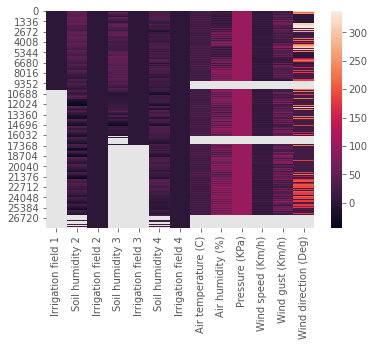

In [93]:
data_new = data.iloc[:,2:15]
sns.heatmap(data_new)
plt.show()

# Dealing with the missing values

In [94]:
#Checking percentage of missing data in every column
(data.isnull().sum()/len(data))*100

timestamp                0.000000
Soil humidity 1         68.209205
Irrigation field 1      64.112803
Soil humidity 2          6.221256
Irrigation field 2       0.071304
Soil humidity 3         42.650362
Irrigation field 3      38.550394
Soil humidity 4          6.214125
Irrigation field 4       0.071304
Air temperature (C)     14.453278
Air humidity (%)        14.453278
Pressure (KPa)          14.453278
Wind speed (Km/h)       14.453278
Wind gust (Km/h)        14.453278
Wind direction (Deg)    14.453278
dtype: float64

In [95]:
#Filling the missing values for continuous variables with mean
data['Soil humidity 1']=data['Soil humidity 1'].fillna(data['Soil humidity 1'].mean())
data['Irrigation field 1']=data['Irrigation field 1'].fillna(data['Irrigation field 1'].mean())

In [96]:
#check if the nan value fill or not by calculate the perc %
(data.isnull().sum()/len(data))*100

timestamp                0.000000
Soil humidity 1          0.000000
Irrigation field 1       0.000000
Soil humidity 2          6.221256
Irrigation field 2       0.071304
Soil humidity 3         42.650362
Irrigation field 3      38.550394
Soil humidity 4          6.214125
Irrigation field 4       0.071304
Air temperature (C)     14.453278
Air humidity (%)        14.453278
Pressure (KPa)          14.453278
Wind speed (Km/h)       14.453278
Wind gust (Km/h)        14.453278
Wind direction (Deg)    14.453278
dtype: float64

In [97]:
data['Soil humidity 2']=data['Soil humidity 2'].fillna(data['Soil humidity 2'].mean())
data['Irrigation field 2']=data['Irrigation field 2'].fillna(data['Irrigation field 2'].mean()) 

data['Soil humidity 3']=data['Soil humidity 3'].fillna(data['Soil humidity 3'].mean())
data['Irrigation field 3']=data['Irrigation field 3'].fillna(data['Irrigation field 3'].mean()) 

data['Soil humidity 4']=data['Soil humidity 4'].fillna(data['Soil humidity 4'].mean())
data['Irrigation field 4']=data['Irrigation field 4'].fillna(data['Irrigation field 4'].mean()) 

data['Air temperature (C)']=data['Air temperature (C)'].fillna(data['Air temperature (C)'].mean())
data['Air humidity (%)']=data['Air humidity (%)'].fillna(data['Air humidity (%)'].mean())
data['Pressure (KPa)']=data['Pressure (KPa)'].fillna(data['Pressure (KPa)'].mean())
data['Wind speed (Km/h)']=data['Wind speed (Km/h)'].fillna(data['Wind speed (Km/h)'].mean())
data['Wind gust (Km/h)']=data['Wind gust (Km/h)'].fillna(data['Wind gust (Km/h)'].mean())
data['Wind direction (Deg)']=data['Wind direction (Deg)'].fillna(data['Wind direction (Deg)'].mean())




In [98]:
#check if the nan value fill or not by calculate the perc %
(data.isnull().sum()/len(data))*100

timestamp               0.0
Soil humidity 1         0.0
Irrigation field 1      0.0
Soil humidity 2         0.0
Irrigation field 2      0.0
Soil humidity 3         0.0
Irrigation field 3      0.0
Soil humidity 4         0.0
Irrigation field 4      0.0
Air temperature (C)     0.0
Air humidity (%)        0.0
Pressure (KPa)          0.0
Wind speed (Km/h)       0.0
Wind gust (Km/h)        0.0
Wind direction (Deg)    0.0
dtype: float64

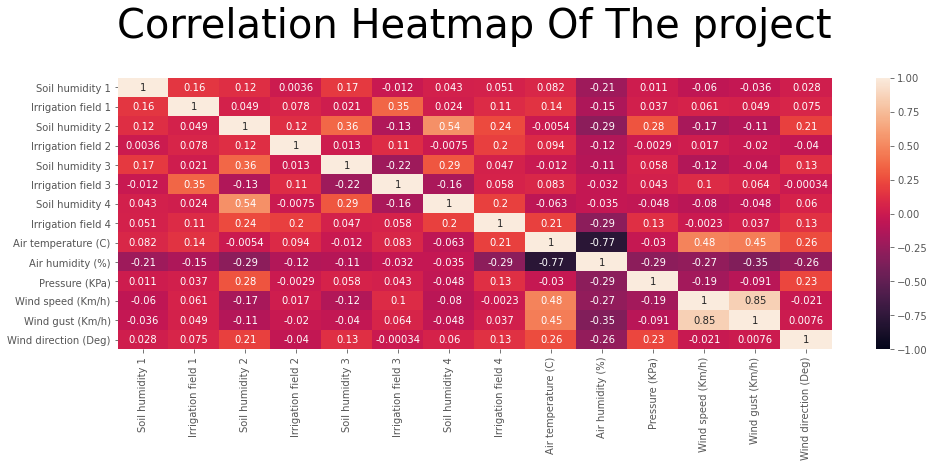

In [99]:
plt.figure(figsize=(16,5))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap Of The project', fontdict={'fontsize':40}, pad=40);



### The objective of this project is to accurately predict the soil moisture level multiple days in advance. This solution will help farmers prepare their irrigation schedules more efficiently.

In [100]:
col_names=data.columns.values
print(col_names)

['timestamp' 'Soil humidity 1' 'Irrigation field 1' 'Soil humidity 2'
 'Irrigation field 2' 'Soil humidity 3' 'Irrigation field 3'
 'Soil humidity 4' 'Irrigation field 4' 'Air temperature (C)'
 'Air humidity (%)' 'Pressure (KPa)' 'Wind speed (Km/h)'
 'Wind gust (Km/h)' 'Wind direction (Deg)']


In [112]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 2], 
                                                    test_size = 0.2, random_state=42)

# Ok, which feature looks promising? We'll restrict ourselves to one for now
train_df = X_train.copy()
train_df['Irrigation field 1'] = y_train

train_df['Irrigation field 1 Tomorrow'] = train_df['Irrigation field 1'].apply(lambda x: '1' if x==1 else '0')
train_df.head()

Soil humidity 1  Irrigation field 1  Soil humidity 2  \
10421        63.025653            0.177727        30.460000   
25127        63.025653            0.177727        19.360000   
27017        63.025653            0.177727        18.767424   
16316        63.025653            0.177727        32.920000   
6522         72.840000            1.000000        29.510000   

       Irrigation field 2  Soil humidity 3  Irrigation field 3  \
10421                 0.0        16.560000            0.000000   
25127                 0.0        25.046062            0.245243   
27017                 0.0        25.046062            0.245243   
16316                 0.0        25.046062            0.000000   
6522                  0.0        55.220000            0.000000   

       Soil humidity 4  Irrigation field 4  Air temperature (C)  \
10421         8.000000                 0.0             16.90000   
25127         7.710000                 1.0             17.67000   
27017        17.512501                 0.0             24.26378   
16316        27.600000                 0.0             24.26378   
6522         37.800000                 0.0             35.05000   

       Air humidity (%)  Pressure (KPa)  Wind speed (Km/h)  Wind gust (Km/h)  \
10421         96.000000      101.270000           5.920000         17.520000   
25127         96.000000      101.070000           3.600000          8.480000   
27017         58.521052      101.131418           9.896898         41.744905   
16316         58.521052      101.131418           9.896898         41.744905   
6522          27.640000      100.790000          11.550000         50.080000   

       Wind direction (Deg) Irrigation field 1 Tomorrow  
10421             22.500000                           0  
25127            180.000000                           0  
27017             93.983796                           0  
16316             93.983796                           0  
6522             180.000000                           1

In [123]:
# plant1 = data.drop(['Soil humidity 2', 'Irrigation field 2', 'Soil humidity 3', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
#x = data.loc[:,'Soil humidity 1':'Air humidity (%)']
#y = data['Irrigation field 1']
#x.head()
#sns.pairplot(train_df, hue='location');
# printing data type of 'num' 


SyntaxError: invalid syntax (<ipython-input-123-3a2a1faea9bc>, line 8)

In [74]:
#y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Irrigation field 1, dtype: float64

In [102]:
#y = data.RainTomorrow.values
#x_data = data.drop('RainTomorrow', axis=1)
#x_data.head()

C:\Users\cv\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


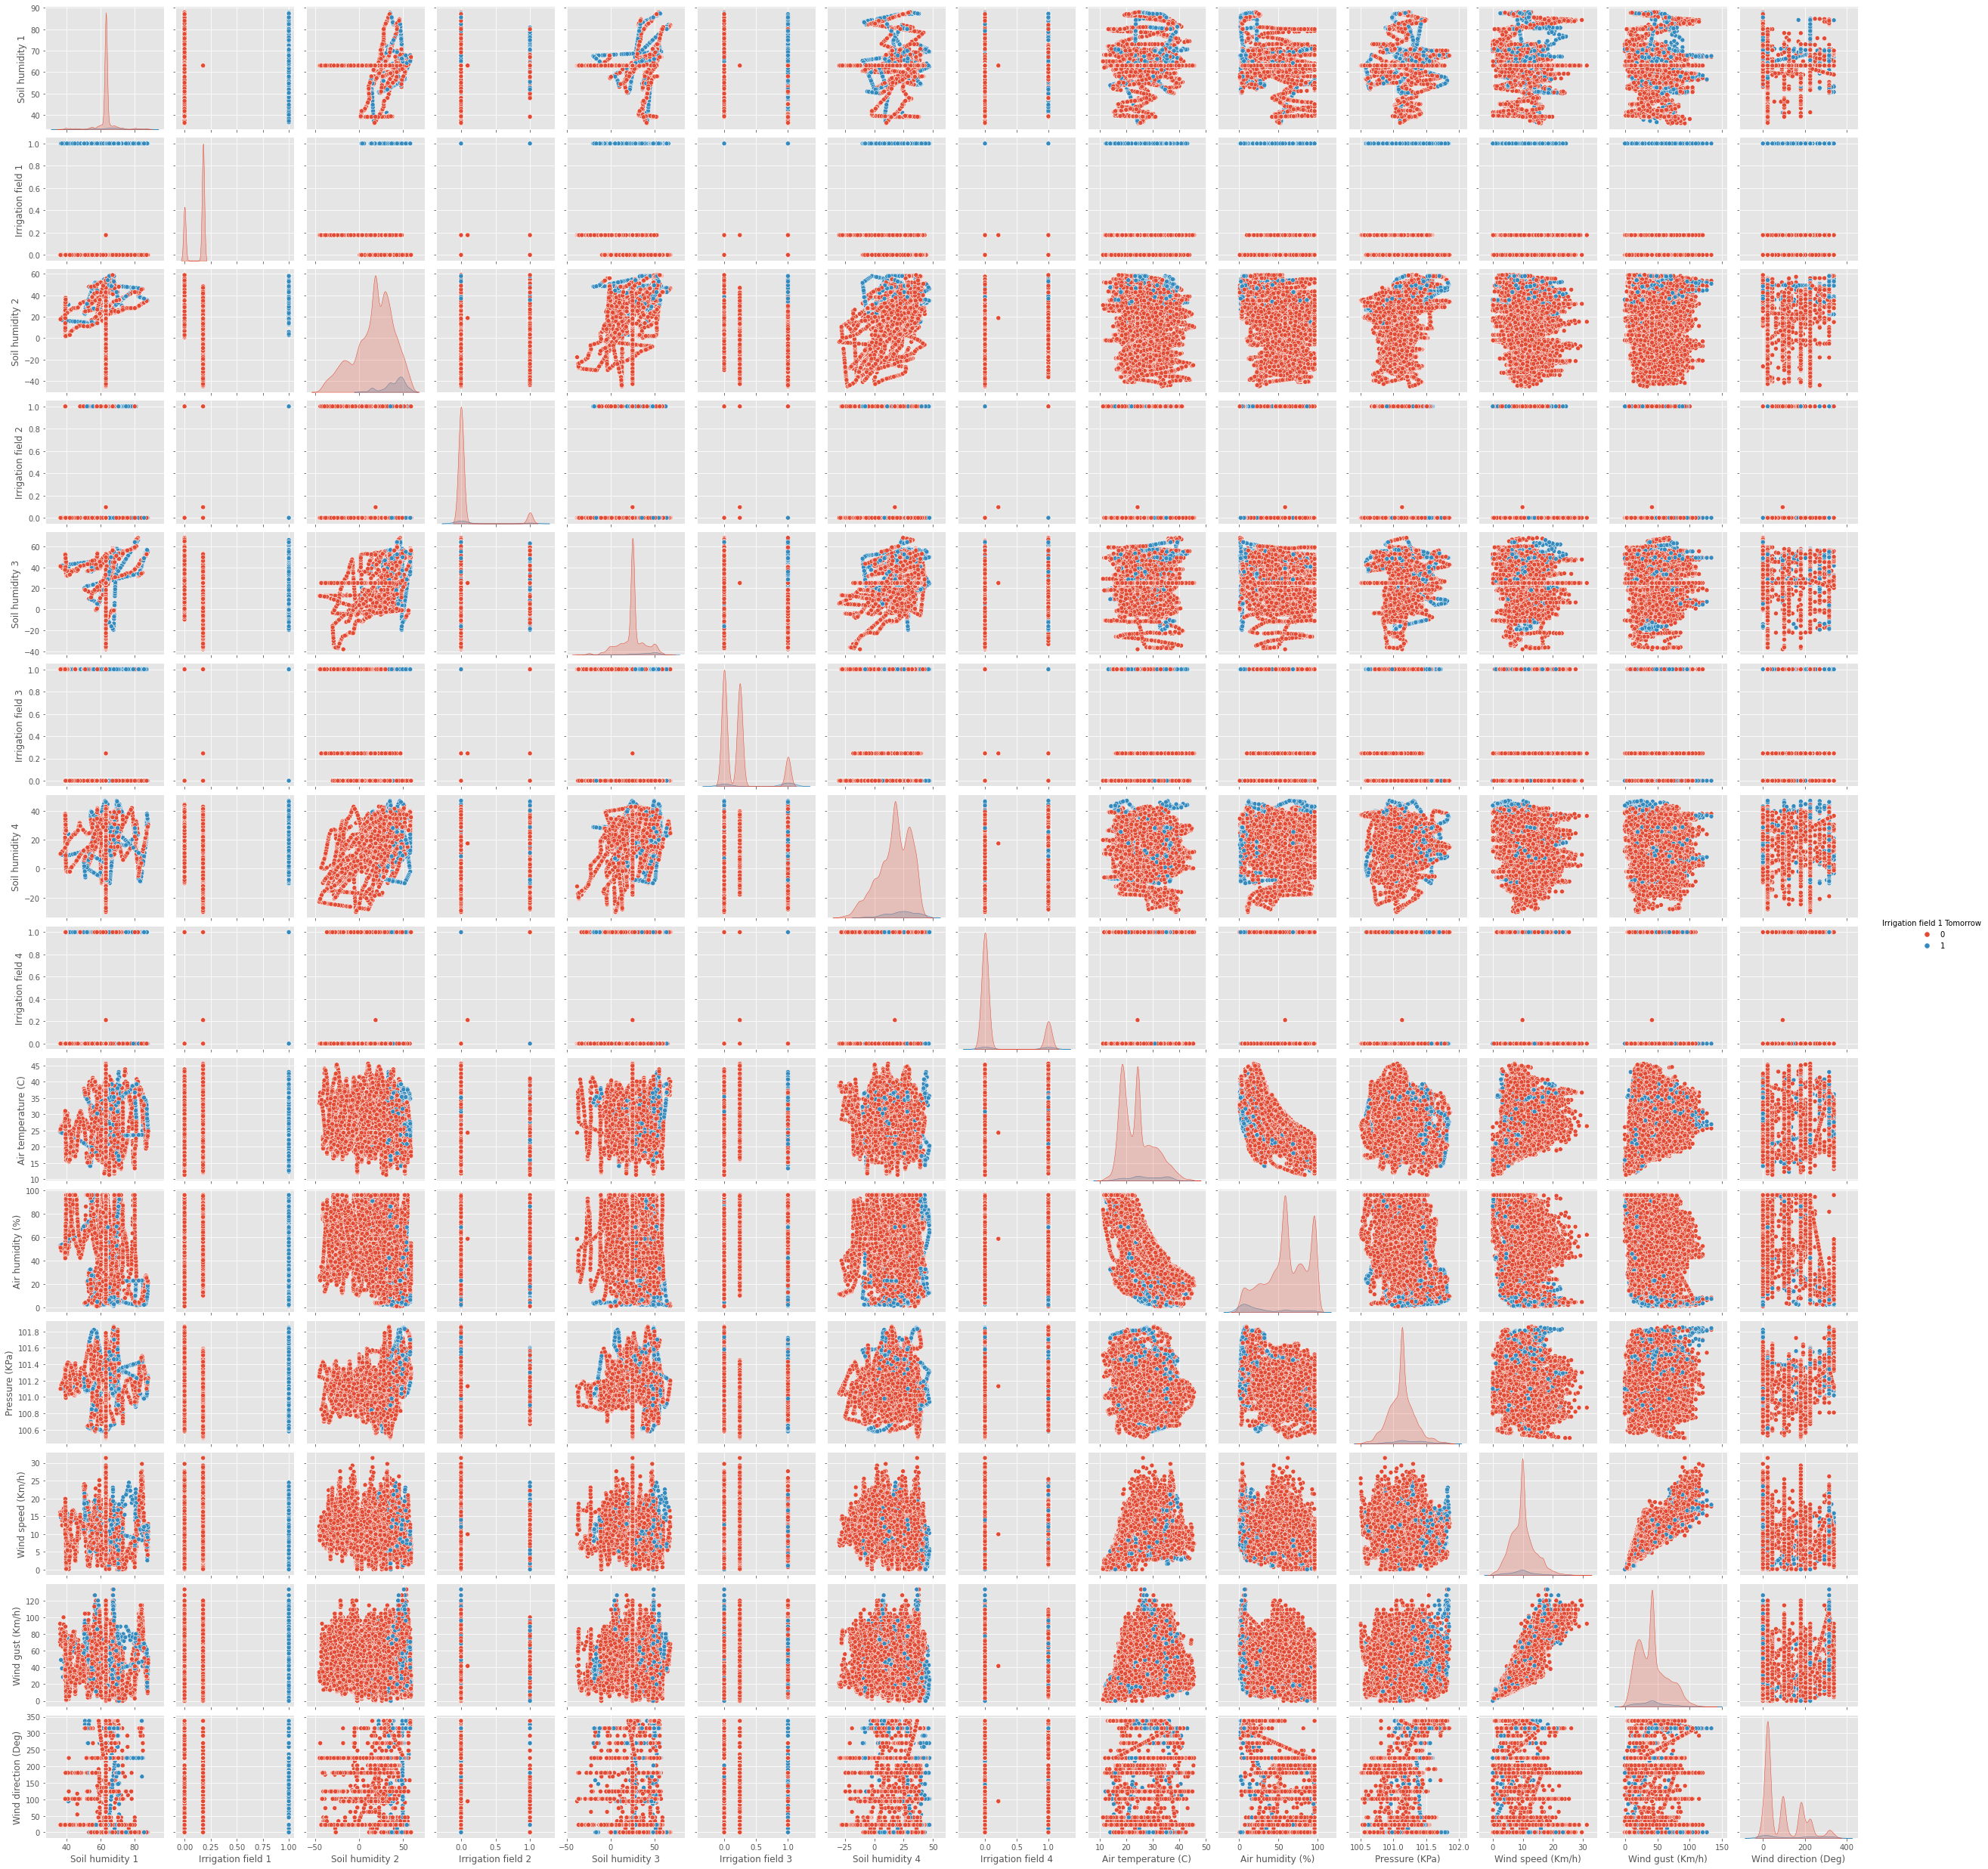

In [113]:
sns.pairplot(train_df, hue='Irrigation field 1 Tomorrow');

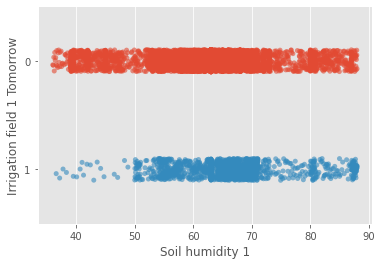

In [114]:
sns.stripplot(x='Soil humidity 1',y='Irrigation field 1 Tomorrow', jitter=True,data=train_df,alpha=0.6);

ValueError: Could not interpret input 'Irrigation field 1 Tomorrow'

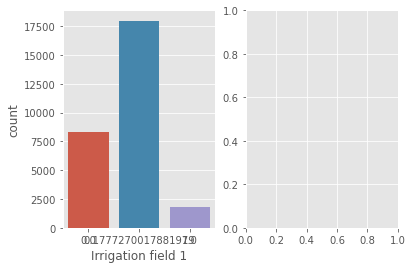

<Figure size 1440x1440 with 0 Axes>

In [122]:
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(20,20))
sns.countplot(data=data,x='Irrigation field 1',ax=ax[0])
sns.countplot(data=data,x='Irrigation field 1 Tomorrow',ax=ax[1])

In [ ]:
std_scale = StandardScaler()

X_train = train_df[['Soil humidity 1', 'Air humidity (%)']]
#X_train_scaled = std_scale.fit_transform(X_train)

lm = LogisticRegression(solver='liblinear', C=1000)
lm.fit(X_train, y_train)